<a href="https://colab.research.google.com/github/turgonboyev/Google_Colab_uchun/blob/main/Aviachipta_narxini_bashorat_qilish(kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/turgonboyevbotir/Portfolio/main/datasets/Aviachipta%20narxi/train_data.csv')
train.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


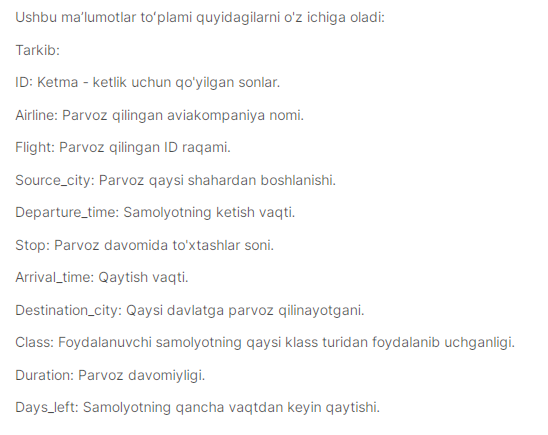

In [2]:
train.shape

(20000, 12)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [4]:
train.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


In [5]:
train.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

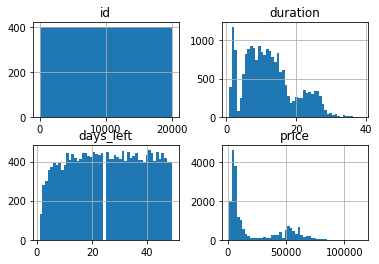

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

train.hist(bins=50, figsize=(6, 4))
plt.show()

In [7]:
train.corrwith(train['price']).abs().sort_values(ascending=False)

price        1.000000
duration     0.213158
days_left    0.102545
id           0.002443
dtype: float64

In [8]:
train.columns

Index(['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [9]:
#id ni bizga foydasi tegmaydi
train.drop(['id'], axis=1, inplace=True)

In [10]:
train.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

**X** va **Y** ga bo'lib chiqamiz

In [11]:
x = train.drop('price', axis=1)
columns = x.columns
x.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21
1,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7
2,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5
3,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28
4,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4


In [12]:
y = train['price']
y.head()

0     7212
1     5292
2    60553
3     5760
4    10712
Name: price, dtype: int64

In [13]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

enc = OrdinalEncoder()

x = enc.fit_transform(x)
x = pd.DataFrame(x, columns=columns)
x.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,162.0,20.0
1,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,11.0,6.0
2,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,106.0,4.0
3,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,71.0,27.0
4,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,14.0,3.0


In [14]:
x['price'] = y

In [15]:
x.corrwith(x['price']).abs().sort_values(ascending=False)

price               1.000000
class               0.937868
flight              0.303288
airline             0.241193
duration            0.214520
stops               0.201309
days_left           0.102545
departure_time      0.058520
arrival_time        0.046801
source_city         0.013570
destination_city    0.008747
dtype: float64

Keraksiz ustunlarni olib tashlaymiz

In [16]:
x.drop(['destination_city', 'source_city', 'arrival_time', 'departure_time', 'days_left'], axis=1, inplace=True)
x.head()

,airline,flight,stops,class,duration,price
0,5.0,1214.0,0.0,1.0,162.0,7212
1,4.0,1126.0,2.0,1.0,11.0,5292
2,5.0,1245.0,0.0,0.0,106.0,60553
3,5.0,1191.0,0.0,1.0,71.0,5760
4,3.0,275.0,2.0,1.0,14.0,10712


In [17]:
x.drop('price', axis=1, inplace=True)

In [18]:
#Qiymatlarni 0 va 1 oralig'iga tushirib olamiz
for i in x.columns:
  x[i] = np.asanyarray(x[i]) / x[i].max()

y = np.asanyarray(y) / y.max()

In [19]:
from sklearn.linear_model import LinearRegression

MLR_model = LinearRegression()

MLR_model.fit(x, y)

LinearRegression()

Endi test qilamiz

In [20]:
test = pd.read_csv('https://raw.githubusercontent.com/turgonboyevbotir/Portfolio/main/datasets/Aviachipta%20narxi/test_data.csv')

test.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [21]:
test.shape

(5000, 11)

In [22]:
#id ustunni olib tashlaymiz
test.drop(['id'], axis=1, inplace=True)

x_test = enc.fit_transform(test)
x_test = pd.DataFrame(x_test, columns=columns)

#Korrelatsiya kam bo'lgan ustunlarni o'chiramiz
x_test.drop(['destination_city', 'source_city', 'arrival_time', 'departure_time', 'days_left'], axis=1, inplace=True)


#Qiymatlarni 0 va 1 oralig'iga tushirib olamiz
for i in x_test.columns:
  x_test[i] = np.asanyarray(x_test[i]) / x_test[i].max()

In [23]:
y_predict = MLR_model.predict(x_test) * 100000

In [24]:
simple = pd.read_csv('https://raw.githubusercontent.com/turgonboyevbotir/Portfolio/main/datasets/Aviachipta%20narxi/sample_solution.csv')

simple.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [25]:
simple['price'] = y_predict
simple.head()

,id,price
0,1,45939.326051
1,2,47819.851428
2,3,37531.226103
3,4,3613.869457
4,5,5619.078897


In [26]:
simple.head()

,id,price
0,1,45939.326051
1,2,47819.851428
2,3,37531.226103
3,4,3613.869457
4,5,5619.078897


In [27]:
simple.columns

Index(['id', 'price'], dtype='object')

In [28]:
simple.to_csv('submit.csv', index=False)